In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats


Does the Average Cost of the School by State impact the Average Completion Rate?

There is a postive correlation between cost of the school (Average Cost of Attendance) and the % Completion Rate, ie. the most expensive schools have the highest completion rate.  

Scatter chart- Average Cost of Attendance by State *R square value= 0.8540
State        Average Cost of Attendance
 VT                     52014.0
 MA                     50279.0
 DC                     50176.0
 RI                     48508.0

Does the % Federal Loans Received by students per State impact the cost of the school and the average completion rate?

The % Federal Loans received by students per State does not have a direct correlation on either completion rate or cost of the schools.  While it is true that the most expensive schools student population receive >85% Federal Loans, we cannot say that is the cause for the high cost of the schools or vice versa, that >85% of the students have Federal Loans due to the cost of the school because from the data set schools that are not the most expensive have a student population of >85% that recieve Federal Loans.

There are other factors that are not reviewed in this analysis that could impact both the completion rate and the high cost of the school by State.

Bar chart- %Completion Rate by State 
State    Completion_Rate
 MA         0.746079
 VT         0.722575
 RI         0.712740

Scatter Chart- %Federal Loans by %Completion Rate  *R square value=0.6035

Steps taken to perform Data Analysis:
1. import csv from git hub
2. Review df and extract only columns that I want to analyze
3. Remove NAN
4. Create new df after groupby and calculations (reset_index)
5. Create plots (scatter and bar chart)
6. extract significant data points to examine
7. perform R square calculation as part of analysis






In [2]:
college_df=pd.read_csv("school_data.csv")

In [3]:
college_df.head()

,Unnamed: 0,Name,City,State,School Ownership,Number of Undergraduate Students,Share of Female Students,Share of Male Students,Share of Undergraduates Aged 25 and Above,Average Age of Entry,Admission Rate,Completion Rate,Median Earnings of Students 10 Years After Entry,Median Debt for Students Who Have Completed,Share of Students Who Received a Federal Loan,Median Family Income,Average Cost of Attendance,Average Faculty Salary,Net Tuition Revenue per Student
0,0,University of Phoenix-Arizona,Tempe,AZ,3,77269,0.697281,0.302719,0.8601,32.0,NaN,0.1433,47100.0,31977.0,0.842856,18602.0,20083.0,4485.0,13180
1,1,Southern New Hampshire University,Manchester,NH,2,68214,0.676671,0.323329,0.7502,31.0,0.7805,0.4880,45400.0,18347.5,0.929532,27192.0,49005.0,8012.0,10531
2,2,University of Central Florida,Orlando,FL,1,56366,0.589145,0.410855,0.1791,23.0,0.4990,0.7001,45400.0,18130.0,0.698146,31400.0,20950.0,9881.0,5720
3,3,Texas A & M University-College Station,College Station,TX,1,52568,0.511678,0.488322,0.0297,20.0,0.7054,0.8210,58000.0,18519.5,0.804655,58904.0,28143.0,11165.0,10518
4,4,Miami Dade College,Miami,FL,1,51015,0.581050,0.418950,0.2815,22.0,NaN,0.3119,31100.0,8750.0,0.085088,18391.0,12476.0,7102.0,1729


In [4]:
#create df to extract required columns
complete_college_df=college_df[['State','Completion Rate','Average Cost of Attendance','Share of Students Who Received a Federal Loan',]]

In [5]:
#review new df
complete_college_df.head()

,State,Completion Rate,Average Cost of Attendance,Share of Students Who Received a Federal Loan
0,AZ,0.1433,20083.0,0.842856
1,NH,0.4880,49005.0,0.929532
2,FL,0.7001,20950.0,0.698146
3,TX,0.8210,28143.0,0.804655
4,FL,0.3119,12476.0,0.085088


In [6]:
#remove NaN values from new df
complete_college_df.dropna(how='any', inplace=True)

complete_college_df.head()

,State,Completion Rate,Average Cost of Attendance,Share of Students Who Received a Federal Loan
0,AZ,0.1433,20083.0,0.842856
1,NH,0.4880,49005.0,0.929532
2,FL,0.7001,20950.0,0.698146
3,TX,0.8210,28143.0,0.804655
4,FL,0.3119,12476.0,0.085088


In [38]:
Cost=complete_college_df.groupby('State').mean()['Average Cost of Attendance'].round()
Cost_df=pd.DataFrame(Cost).reset_index()
Cost_df.head()

,State,Average Cost of Attendance
0,AK,18147.0
1,AL,25073.0
2,AR,20429.0
3,AZ,26879.0
4,CA,37509.0


In [8]:
completeState=complete_college_df.groupby('State').mean()['Completion Rate']
CompleteState=pd.DataFrame(completeState).reset_index()
CompleteState.columns=['State','Completion_Rate']
CompleteState.head()

,State,Completion_Rate
0,AK,0.272450
1,AL,0.453375
2,AR,0.398882
3,AZ,0.493200
4,CA,0.650353


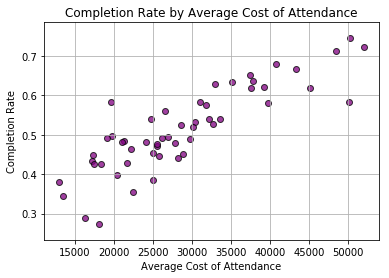

In [39]:
#Completion Rate comparison between Average cost of attendance
plt.scatter(Cost_df["Average Cost of Attendance"], CompleteState["Completion_Rate"], facecolor="Purple", edgecolor="black",alpha=0.75)
plt.title("Completion Rate by Average Cost of Attendance")
plt.ylabel("Completion Rate")
plt.xlabel("Average Cost of Attendance")
plt.grid(True)
plt.savefig("Completion Rate and Cost.png")
plt.show()

In [40]:
Cost_df1=Cost_df.loc[Cost_df["Average Cost of Attendance"]>47500,:]
print(Cost_df1)

   State  Average Cost of Attendance
7     DC                     50176.0
20    MA                     50279.0
41    RI                     48508.0
48    VT                     52014.0


In [41]:
Cost_df1.sort_values(['Average Cost of Attendance'],ascending=False, inplace=True)
print(Cost_df1)

   State  Average Cost of Attendance
48    VT                     52014.0
20    MA                     50279.0
7     DC                     50176.0
41    RI                     48508.0


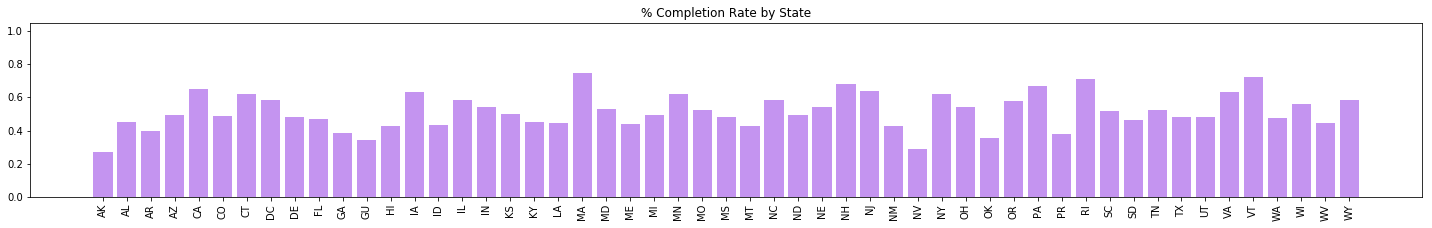

In [69]:
#state with greatest completion rate, possibly look at regional breakdown, explore number of schools per state(state counts below)
#totalR=ride_city.groupby('type').count()['ride_id']
completeState=complete_college_df.groupby('State').mean()['Completion Rate']
CompleteState=pd.DataFrame(completeState).reset_index()
CompleteState.columns=['State','Completion_Rate']
tick_locations = [value for value in CompleteState['State']]
plt.figure(figsize=(20,3))

plt.bar(CompleteState['State'],CompleteState['Completion_Rate'],color="blueviolet", alpha=0.5, align="center")
plt.tight_layout()
plt.xticks(tick_locations,CompleteState['State'], rotation="vertical")
plt.title("% Completion Rate by State")
plt.ylim(0, max(CompleteState['Completion_Rate'])+0.3)
plt.savefig("Completion_Rate_State.png")
plt.show()

In [43]:
complete_college_df.count()

State                                            980
Completion Rate                                  980
Average Cost of Attendance                       980
Share of Students Who Received a Federal Loan    980
dtype: int64

In [57]:
state_counts=complete_college_df["State"].value_counts()
state_counts_df=pd.DataFrame(state_counts).reset_index()
state_counts_df.columns=['State','Count of Schools']
state_counts_df.head()

,State,Count of Schools
0,NY,85
1,CA,59
2,FL,57
3,PA,57
4,TX,46


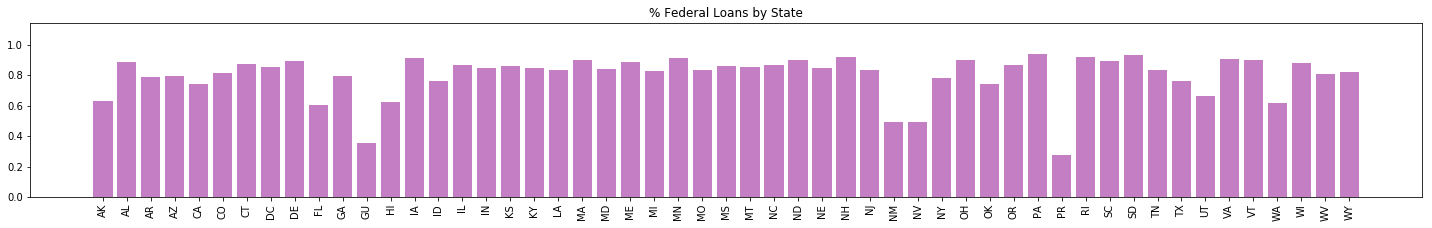

In [70]:
#Share of Students Who Received a Federal Loan by State
FedState=complete_college_df.groupby('State').mean()['Share of Students Who Received a Federal Loan']
FederalState=pd.DataFrame(FedState).reset_index()
FederalState.columns=['State','Percent_Federal_Loans']
tick_locations = [value for value in FederalState['State']]
plt.figure(figsize=(20,3))

plt.bar(FederalState['State'],FederalState['Percent_Federal_Loans'],color="darkmagenta", alpha=0.5, align="center")
plt.tight_layout()
plt.title("% Federal Loans by State")
plt.xticks(tick_locations,FederalState['State'], rotation="vertical")
plt.ylim(0, max(FederalState['Percent_Federal_Loans'])+0.2)
plt.savefig("FederalLoans_State.png")
plt.show()

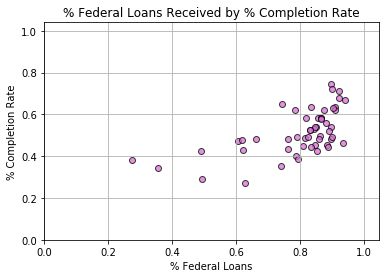

In [46]:
#scatter plot of completion rate % and federal loan %
plt.scatter(FederalState['Percent_Federal_Loans'], CompleteState['Completion_Rate'], facecolor="orchid", edgecolor="black",alpha=0.75)
plt.title("% Federal Loans Received by % Completion Rate")
plt.ylabel("% Completion Rate")
plt.xlabel("% Federal Loans")
plt.ylim(0, max(FederalState['Percent_Federal_Loans'])+0.1)
plt.xlim(0, max(CompleteState['Completion_Rate'])+0.3)
plt.grid(True)
plt.savefig("Completion_Rate_and_Federal_Loan.png")
plt.show()

In [47]:
#only_billys = df.loc[df["first_name"] == "Billy", :]
complete70=CompleteState.loc[CompleteState["Completion_Rate"]>0.70,:]
complete70.sort_values(['Completion_Rate'], ascending=False, inplace=True)
print(complete70)

   State  Completion_Rate
20    MA         0.746079
48    VT         0.722575
41    RI         0.712740


In [48]:
Fed88=FederalState.loc[FederalState["Percent_Federal_Loans"]>0.85,:]
Fed88.sort_values(['Percent_Federal_Loans'],ascending=False,inplace=True)
Fed88.head(25)

,State,Percent_Federal_Loans
39,PA,0.940274
43,SD,0.933216
41,RI,0.920919
31,NH,0.920354
13,IA,0.909710
24,MN,0.909039
47,VA,0.901957
29,ND,0.901036
48,VT,0.899579
36,OH,0.897585


In [54]:
complete60=CompleteState.loc[CompleteState["Completion_Rate"]<0.60,:]
complete60.sort_values(['Completion_Rate'],ascending=False,inplace=True)
complete60

,State,Completion_Rate
28,NC,0.582313
52,WY,0.582000
7,DC,0.581857
15,IL,0.580971
38,OR,0.576610
50,WI,0.560586
30,NE,0.540867
16,IN,0.540508
36,OH,0.538946
21,MD,0.531720


In [68]:
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(FederalState['Percent_Federal_Loans'], CompleteState["Completion_Rate"])
#m_fit = m_slope * year + m_int
print(m_r)

0.603551167889374


In [67]:
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(Cost_df["Average Cost of Attendance"], CompleteState["Completion_Rate"])
#m_fit = m_slope * year + m_int
print(m_r)

0.8540331404014911
